# CommonLit Readability Assessment

## *A [Kaggle hosted competion](https://www.kaggle.com/c/commonlitreadabilityprize "Kaggle hosted competion") to assess text readability to predict right reading level of a passage to predict right reading level of a passage to help academic institutions, teachers and authors to have engaging passages along with right level of challenge for students to develop their reading skills naturally.*- Readme.md containing details about the competition, data, solution approaches and assumptions is suggested to be referred first.

_Readme.md containing details about the competition, data, solution approaches and assumptions is suggested to be referred first._

_Modeling is available in other notebook._

In [1]:
# Imports required packages

import numpy as np
import pandas as pd

import textstat

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Some initialization

sns.set_theme()
textstat.set_lang("en")

## Loading Data & Counting Samples

In [2]:
# Loads data

train = pd.read_csv("./Data/train.csv")
test = pd.read_csv("./Data/test.csv")

In [3]:
print(f"Training sample count: {len(train)}")
print(f"Test sample count: {len(test)}")

Training sample count: 2834
Test sample count: 7


In [4]:
# Checks how the data looks from top few samples

display(train.head())

,id,url_legal,license,excerpt,target,standard_error
0,c12129c31,NaN,NaN,When the young people returned to the ballroom...,-0.340259,0.464009
1,85aa80a4c,NaN,NaN,"All through dinner time, Mrs. Fayre was somewh...",-0.315372,0.480805
2,b69ac6792,NaN,NaN,"As Roger had predicted, the snow departed as q...",-0.580118,0.476676
3,dd1000b26,NaN,NaN,And outside before the palace a great garden w...,-1.054013,0.450007
4,37c1b32fb,NaN,NaN,Once upon a time there were Three Bears who li...,0.247197,0.510845


## Viewing and Getting Statistics of Excerpts

In [5]:
highest_target_index = train.target.argmax()
lowest_target_index = train.target.argmin()

print(f"Easiest Excerpt (Target: {train.target[highest_target_index]}):\n\n"\
     f"{train.excerpt[highest_target_index]}\n\n"\
     f"Most Difficult Excerpt (Target: {train.target[lowest_target_index]}):\n\n"\
     f"{train.excerpt[lowest_target_index]}"\
     )

Easiest Excerpt (Target: 1.711389827):

When you think of dinosaurs and where they lived, what do you picture? Do you see hot, steamy swamps, thick jungles, or sunny plains? Dinosaurs lived in those places, yes. But did you know that some dinosaurs lived in the cold and the darkness near the North and South Poles?
This surprised scientists, too. Paleontologists used to believe that dinosaurs lived only in the warmest parts of the world. They thought that dinosaurs could only have lived in places where turtles, crocodiles, and snakes live today. Later, these dinosaur scientists began finding bones in surprising places.
One of those surprising fossil beds is a place called Dinosaur Cove, Australia. One hundred million years ago, Australia was connected to Antarctica. Both continents were located near the South Pole. Today, paleontologists dig dinosaur fossils out of the ground. They think about what those ancient bones must mean.

Most Difficult Excerpt (Target: -3.676267773):

The commu

In [6]:
# Calculates for some basic statistics for excerpts

train["sentense_count"] = train.excerpt.apply(lambda x: textstat.sentence_count(x))

train["word_count"] = train.excerpt.apply(lambda x: textstat.lexicon_count(x))

train["syllable_count"] = train.excerpt.apply(lambda x: textstat.syllable_count(x))

train["word_count_avg"] = train["word_count"]/train["sentense_count"]

train["syllable_count_avg"] = train["syllable_count"]/train["word_count"]

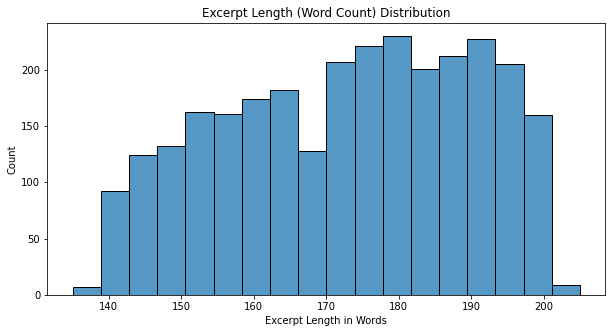

In [7]:
# Plotting for word count distribution in excerpts

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.histplot(x=train.excerpt.str.split().apply(lambda x: len(x)), ax=ax)
ax.set_xlabel("Excerpt Length in Words")
ax.set_title("Excerpt Length (Word Count) Distribution")
plt.show()

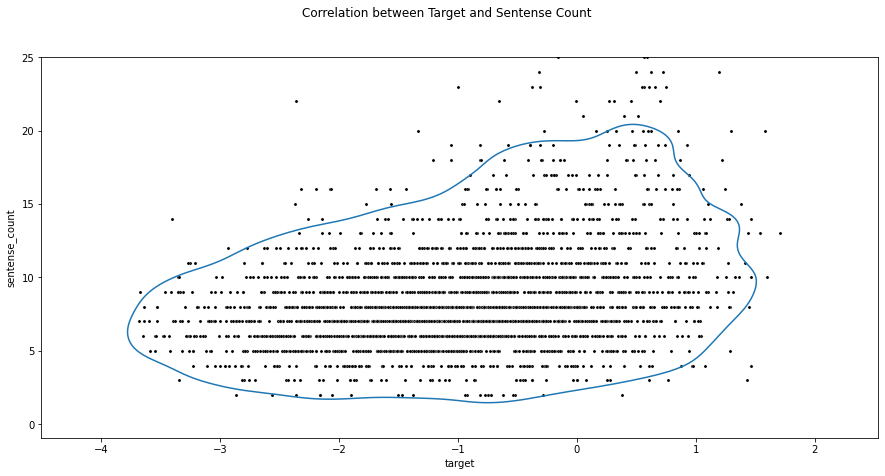

In [8]:
# Plotting correlation between target and sentense count in excerpts

fig, ax = plt.subplots(figsize=(15, 7))
sns.scatterplot(data=train, x="target", y="sentense_count", s=10, color="0", ax=ax)
sns.kdeplot(data=train, x="target", y="sentense_count", levels=1, ax=ax)
fig.suptitle("Correlation between Target and Sentense Count")
plt.ylim(top=25)
plt.show()

Above plot indicates that correlation between excerpt's complexity and number of sentense in the excerpt is not strong.

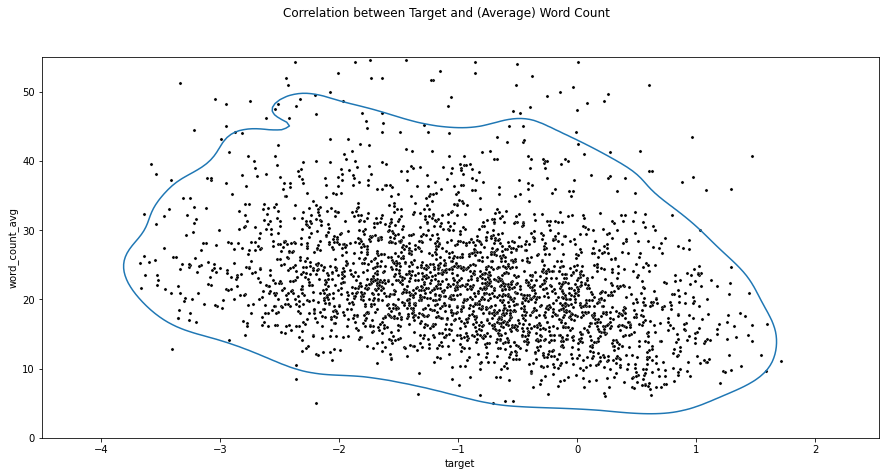

In [9]:
# Plotting correlation between target and word count in excerpts

fig, ax = plt.subplots(figsize=(15, 7))
sns.scatterplot(data=train, x="target", y="word_count_avg", s=10, color="0", ax=ax)
sns.kdeplot(data=train, x="target", y="word_count_avg", levels=1, ax=ax)
fig.suptitle("Correlation between Target and (Average) Word Count")
plt.ylim((0, 55))
plt.show()

Not considering few outliers, the above plot shows that the complexity of excerpts is correlated with (average) number of words in sentenses in the excerpts.

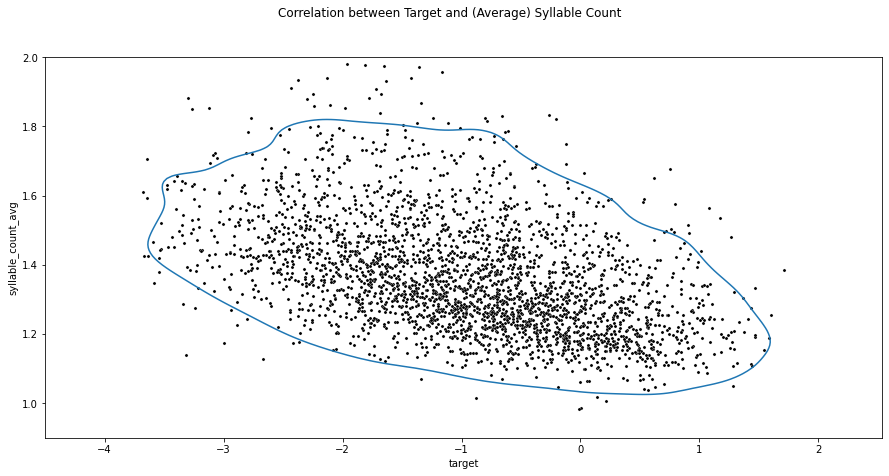

In [11]:
# Plotting correlation between target and (average) number syllables in excerpts

fig, ax = plt.subplots(figsize=(15, 7))
sns.scatterplot(data=train, x="target", y="syllable_count_avg", s=10, color="0", ax=ax)
sns.kdeplot(data=train, x="target", y="syllable_count_avg", levels=1, ax=ax)
fig.suptitle("Correlation between Target and (Average) Syllable Count")
plt.ylim((0.9, 2.0))
plt.show()

The complexity of excerpts is also correlated with number of syllables in the excerpts, as shown in the plot above.

## Correlation between Label and its Error Margin

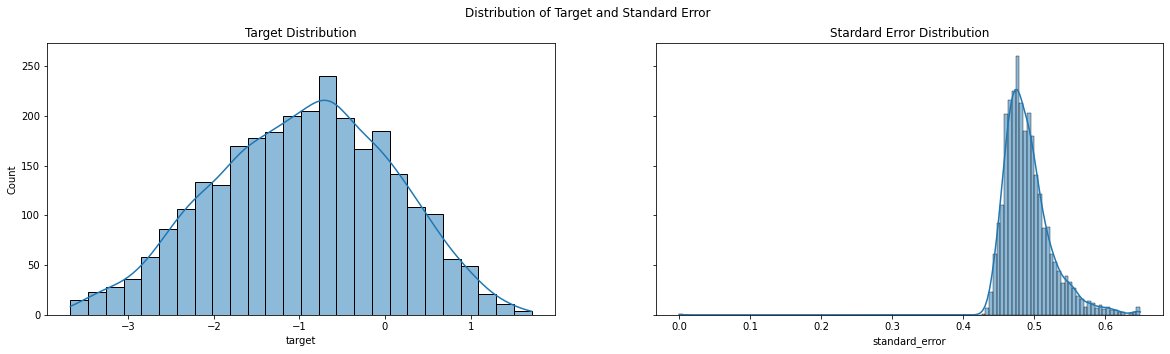

In [12]:
# Checks distributuion of label values

fig, axes = plt.subplots(1, 2, sharey=True, figsize=(20, 5))
fig.suptitle("Distribution of Target and Standard Error")

sns.histplot(x=train.target, kde=True, ax=axes[0])
axes[0].set_title("Target Distribution")

sns.histplot(x=train.standard_error, kde=True, ax=axes[1])
axes[1].set_title("Stardard Error Distribution")

plt.show()

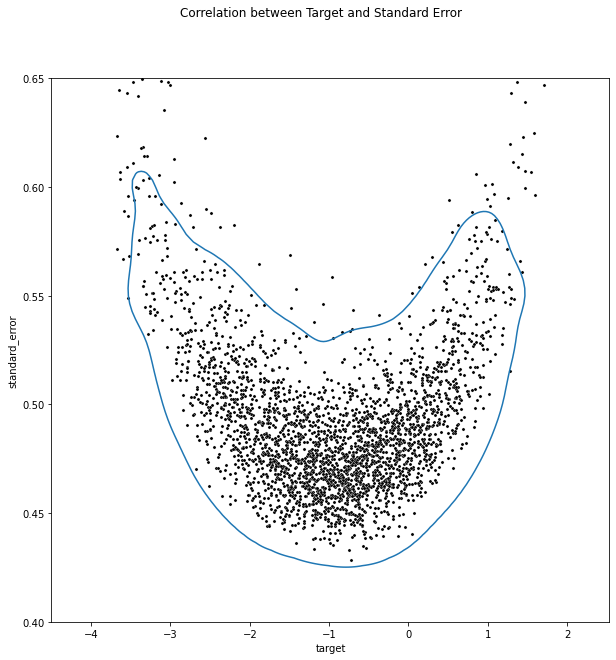

In [13]:
# Finds correlation between "target" and "standard_error"

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
sns.scatterplot(data=train, x="target", y="standard_error", s=10, color="0")
sns.kdeplot(data=train, x="target", y="standard_error", levels=1, ax=ax)
fig.suptitle("Correlation between Target and Standard Error")
plt.ylim((0.4, 0.65))
plt.show()

Target seems to be nearly normally distributed where highest and lowest values goes towards 2 and -4, respectively.
Standar errors are  positively (right) skewed.

Stanard error increases as the target value increases and decreases towards its maximum. That means reviewers opinion deffired while rating easier and complex excerpts.

**_Continuing on modeling notebook to build baseline and performant machine learning models._**